# Genome Assembly 1
Guided Assembly vs. De Novo Assembly

This notebook demonstrates various approaches to assembling genomes from raw reads. First, we’ll perform a guided assembly using recovered Illumina reads from a metagenomic study, specifically assembling begomovirus genomes. Second, we’ll conduct a de novo assembly without a reference.

##Install dependencies and tools##

**Install miniconda**

In [6]:
# @title
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
!conda config --add channels defaults
!conda config --add channels bioconda
!conda config --add channels conda-forge

--2025-11-07 20:13:45--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156323998 (149M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh.1’

Miniconda3-latest-L 100%[===================>] 149.08M   286MB/s    in 0.5s    

2025-11-07 20:13:45 (286 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh.1’ saved [156323998/156323998]

PREFIX=/usr/local
Unpacking bootstrapper...
Unpacking payload...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, ple

**Install fastqc, trim_galore, bwa, samtools, datasets, spades, pilon and quast**

In [7]:
!conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/main
!conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/r


accepted Terms of Service for https://repo.anaconda.com/pkgs/main
accepted Terms of Service for https://repo.anaconda.com/pkgs/r


In [26]:
# @title
!conda install bioconda::fastqc -y
!conda install trim-galore python=3.8 -y
!conda install bioconda::bwa -y
!conda install bioconda::samtools -y
!conda install -c conda-forge ncbi-datasets-cli -y
!conda install bioconda::spades -y
!conda install bioconda::pilon -y
!conda install bioconda::quast -y

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: - \ | / done

# All requested packages already installed.

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: - \ | / - \ | / - \ failed

LibMambaUnsatisfiableError: Encountered problems while solving:
  - package conda-anaconda-tos-0.2.2-py39h06a4308_1 requires python >=3.9,<3.10.0a0, but none of the providers can be installed

Could not solve for environment specs
The following packages are incompatible
├─ conda-anaconda-tos >=0.2.2 * is installable with the potential options
│  ├─ conda-anaconda-tos 0.2.2 would require
│  │  └─ python >=3.9,<3.10.0a0 *, which can be installed;
│  ├─ conda-anaconda-tos 0.2.2 would require
│  │  └─ python >=3.10,<3.11.0a0 *, which can be installed;
│  ├─ conda-anaconda-tos 0.2.2 would requ

# Assisted Assembly Using a Reference
Perform a guided assembly using recovered Illumina reads from a metagenomic study, focusing specifically on assembling begomovirus genomes.

The FASTQ files contain the reads classified as begomovirus. We will focus exclusively on these reads for our analysis."

In [ ]:
!wget https://raw.githubusercontent.com/PlantHealth-Analytics/Genome_assembly/main/field_1.fastq
!wget https://raw.githubusercontent.com/PlantHealth-Analytics/Genome_assembly/main/field_2.fastq

**Run Fastqc for quality control**

In [ ]:
!fastqc *.fastq

**Check results**
Write in the blan space the name of the file the .html extension. Disply in full screen. and then esc to come back to the notebook

Enter the name of the HTML file you want to display (include .html extension): field_1_fastqc.html



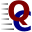
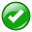
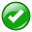
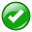
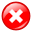
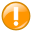
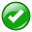
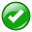
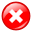
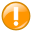
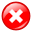
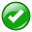
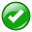
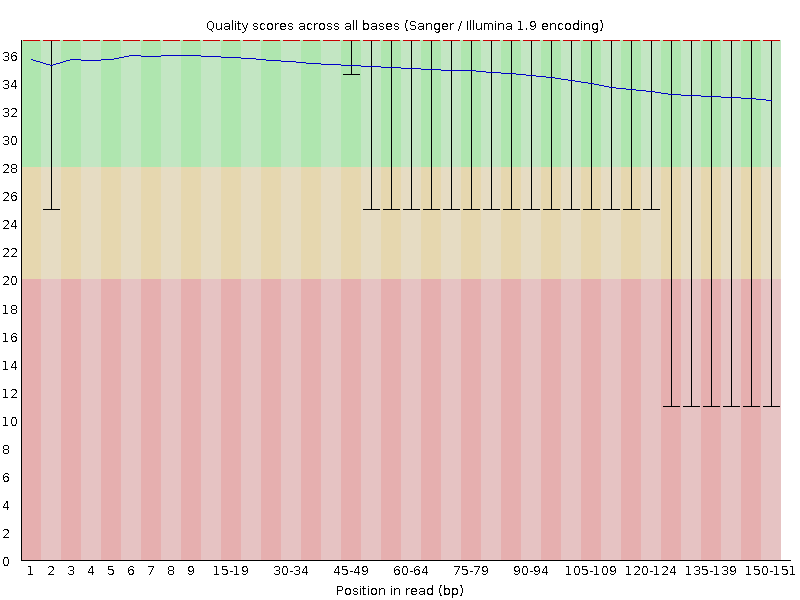
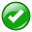
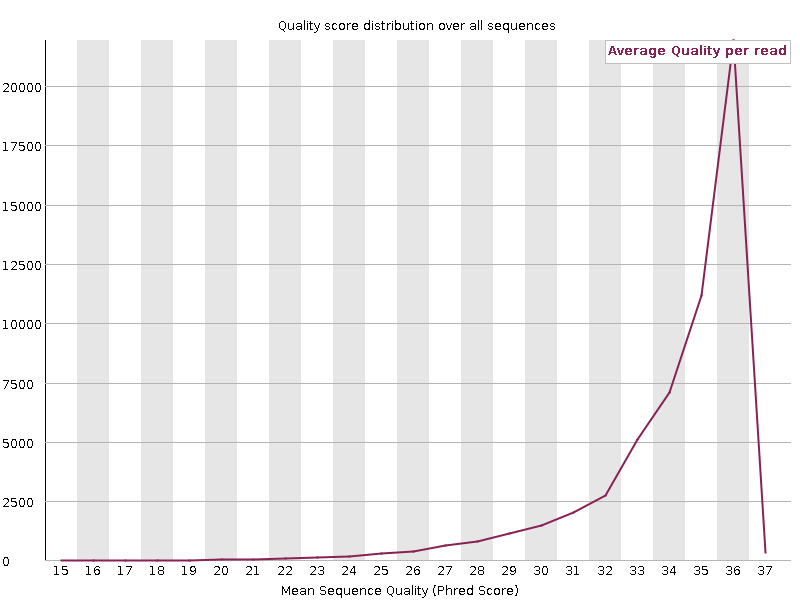
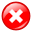
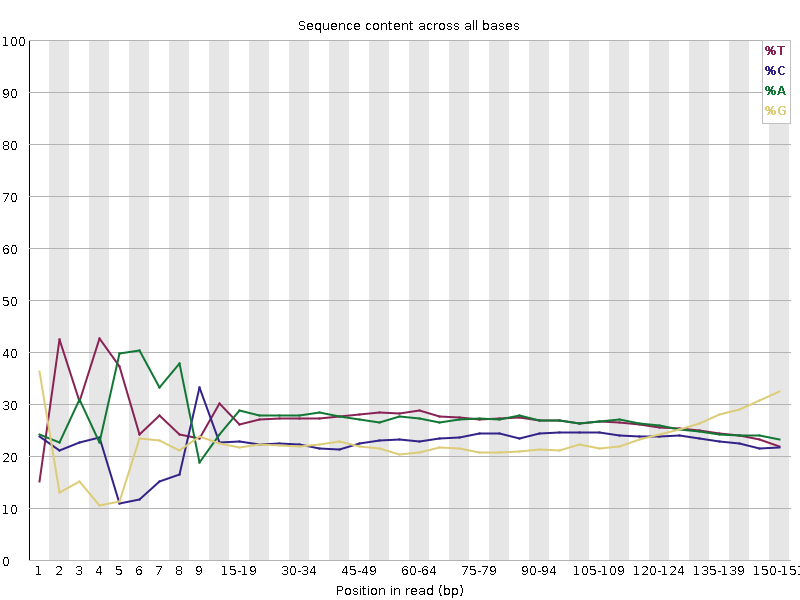
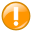
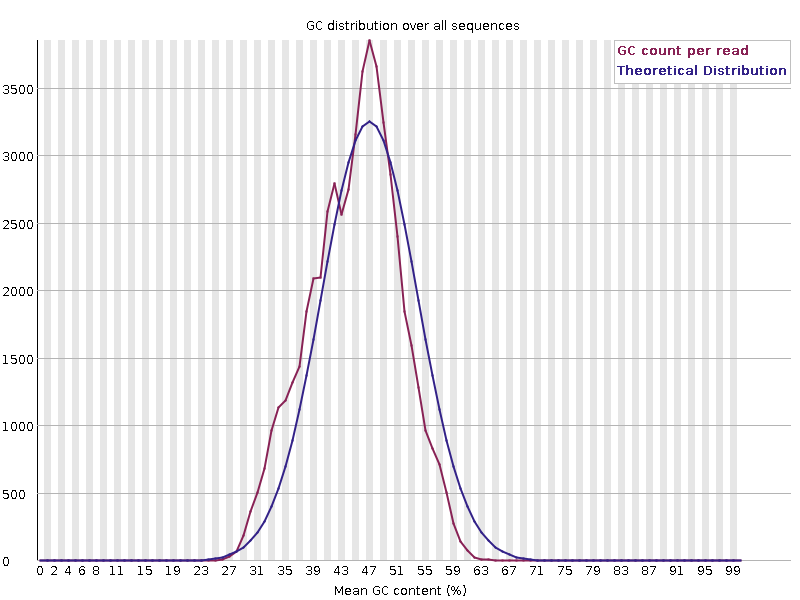
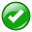
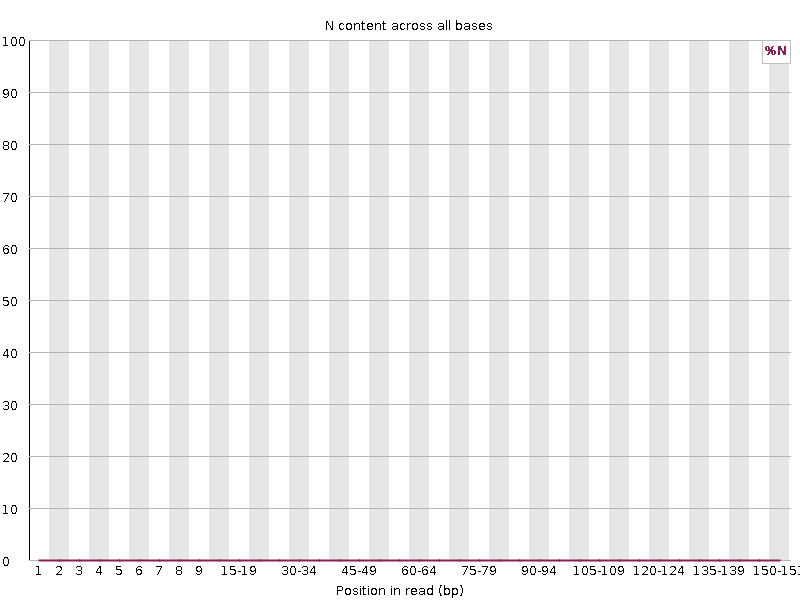
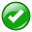
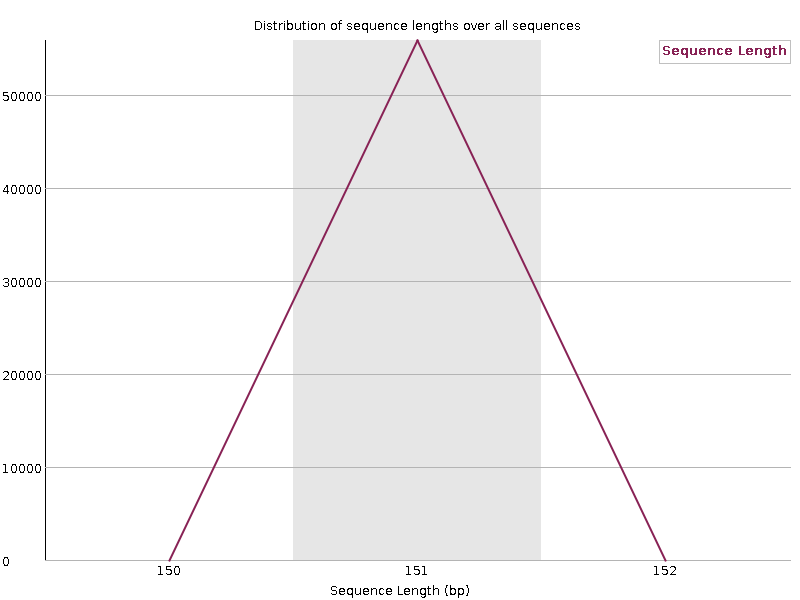
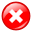
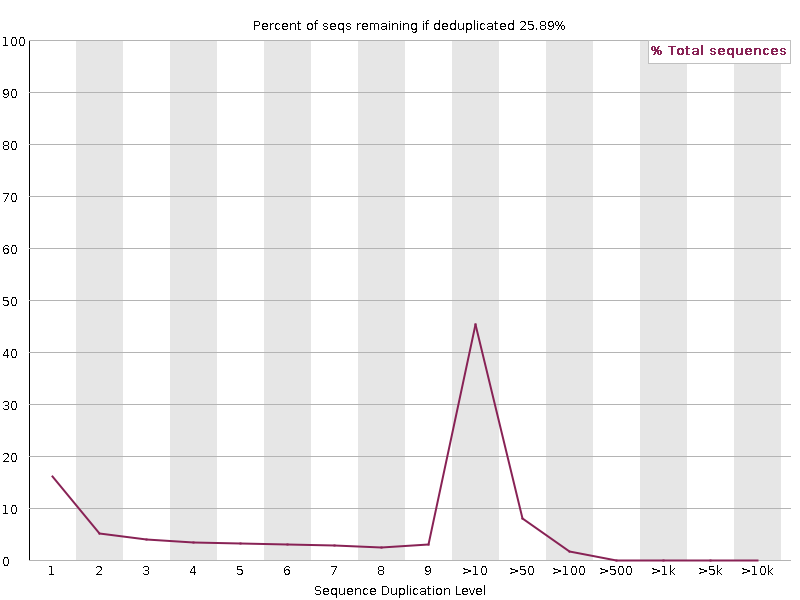
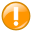
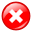
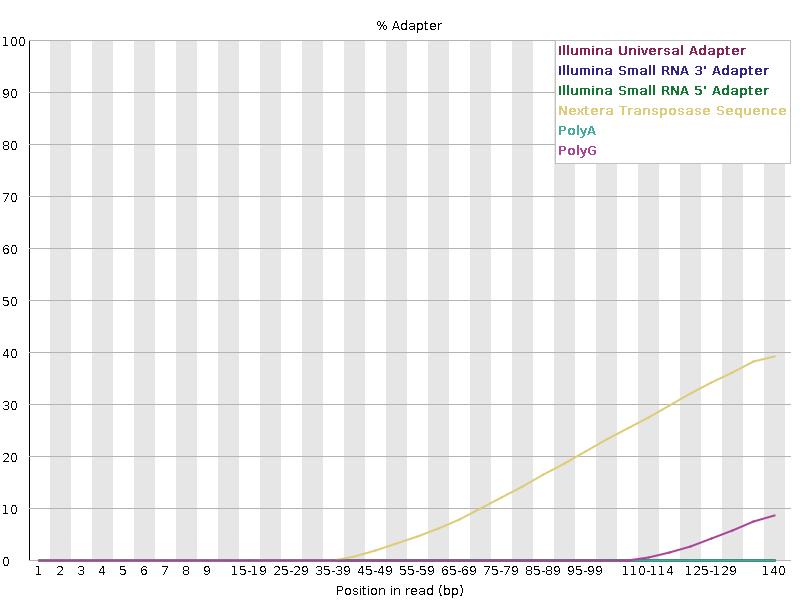

In [11]:
import os
from IPython.core.display import display, HTML

# Ask the user for the file name they want to display
file_name = input("Enter the name of the HTML file you want to display (include .html extension): ")

# Check if the file exists
if os.path.exists(file_name):
    # Open and read the HTML file
    with open(file_name, 'r') as file:
        html_content = file.read()
        display(HTML(html_content))  # Display the HTML content
else:
    print(f"File '{file_name}' not found. Please ensure the file exists in the current directory.")


**Remove adapters and filter bad quality reads q > 20**

trim-galore will do the job

In [ ]:
%%bash
# 1️⃣  Install micromamba (lightweight conda)
wget -qO- https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba > /dev/null

# 2️⃣  Initialize the shell
eval "$(./bin/micromamba shell hook -s bash)"

# 3️⃣  Create an isolated environment (Python 3.12 avoids cutadapt conflict)
micromamba create -y -n tg -c conda-forge -c bioconda python=3.12 trim-galore cutadapt fastqc

# 4️⃣  Confirm installation
micromamba run -n tg trim_galore --version
micromamba run -n tg cutadapt --version


In [72]:
%%bash
# Activate micromamba shell
eval "$(./bin/micromamba shell hook -s bash)"
micromamba run -n tg trim_galore --paired field_1.fastq field_2.fastq --clip_R1 15 --clip_R2 15 --length 80
# Run Trim Galore on a test file (change names as needed)
#micromamba run -n tg trim_galore --help
# Example real run:
# micromamba run -n tg trim_galore -q 20 --fastqc reads.fastq -o output_dir


igzip command line interface 2.31.1


Multicore support not enabled. Proceeding with single-core trimming.
Path to Cutadapt set as: 'cutadapt' (default)
Cutadapt seems to be working fine (tested command 'cutadapt --version')
Cutadapt version: 5.2
single-core operation.
igzip detected. Using igzip for decompressing

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)



AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> field_1.fastq <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences analysed	Percentage
Nextera	21996	CTGTCTCTTATA	55829	39.40
smallRNA	0	TGGAATTCTCGG	55829	0.00
Illumina	0	AGATCGGAAGAGC	55829	0.00
Using Nextera adapter for trimming (count: 21996). Second best hit was smallRNA (count: 0)

Writing report to 'field_1.fastq_trimming_report.txt'

SUMMARISING RUN PARAMETERS
Input filename: field_1.fastq
Trimming mode: paired-end
Trim Gal

**Run QC to the new validate reads. XXX_val_X.fq**

In [ ]:
!fastqc *.fq

**Check the quality control results**

Enter the name of the HTML file you want to display (include .html extension): field_2_val_2_fastqc.html



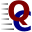
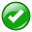
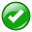
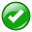
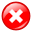
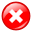
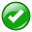
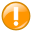
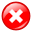
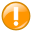
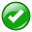
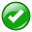
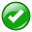
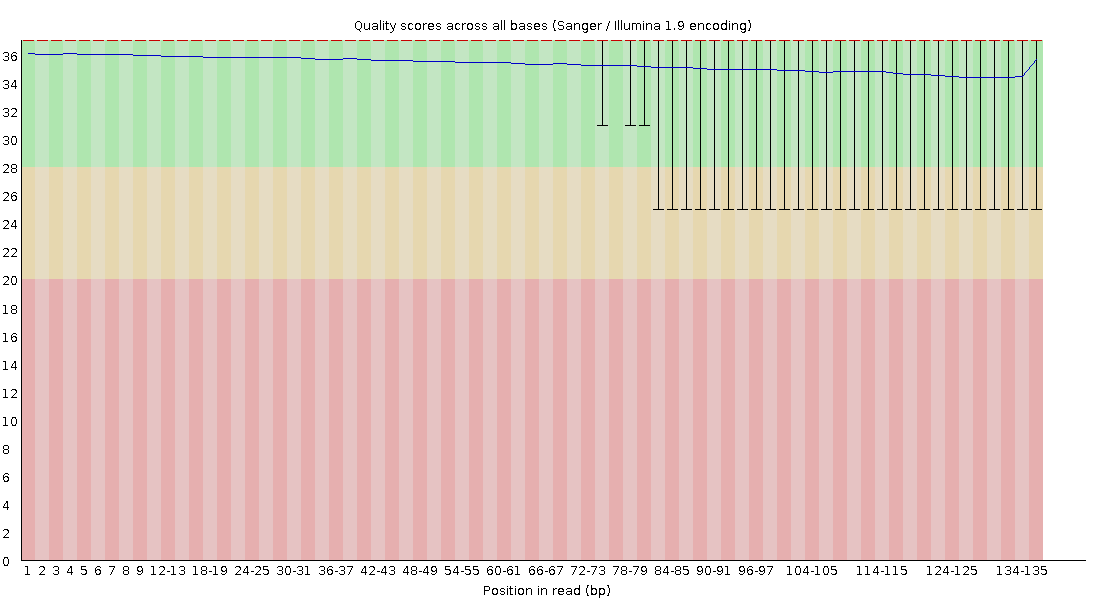
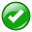
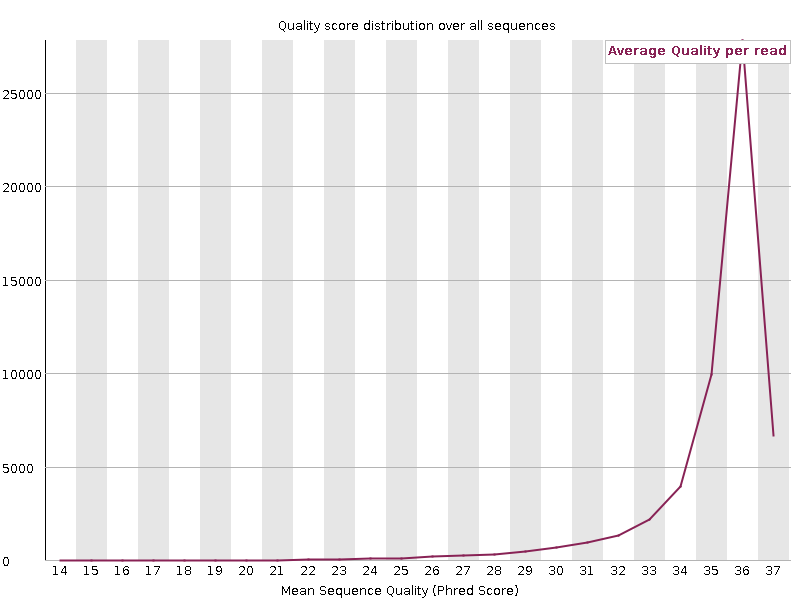
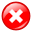
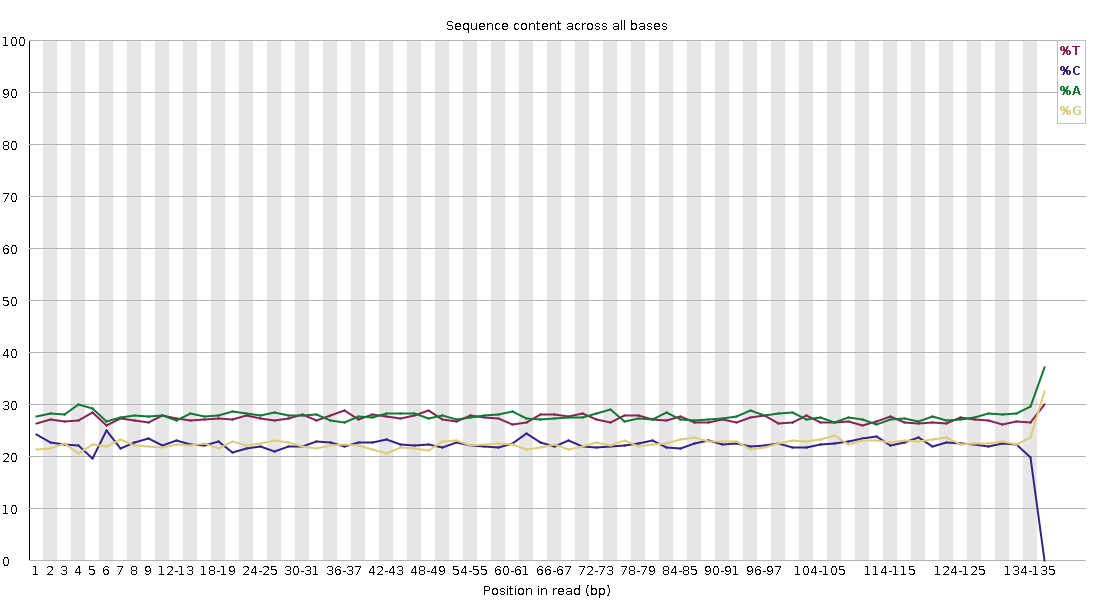
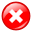
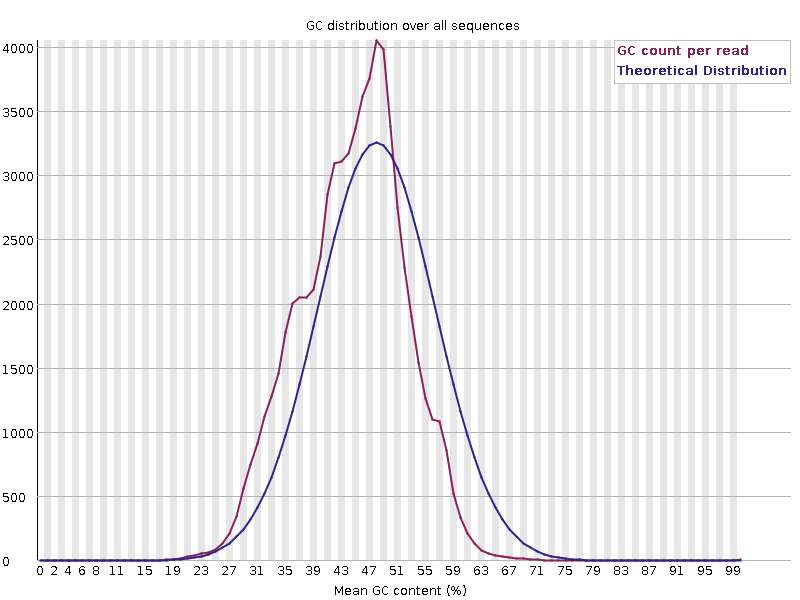
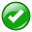
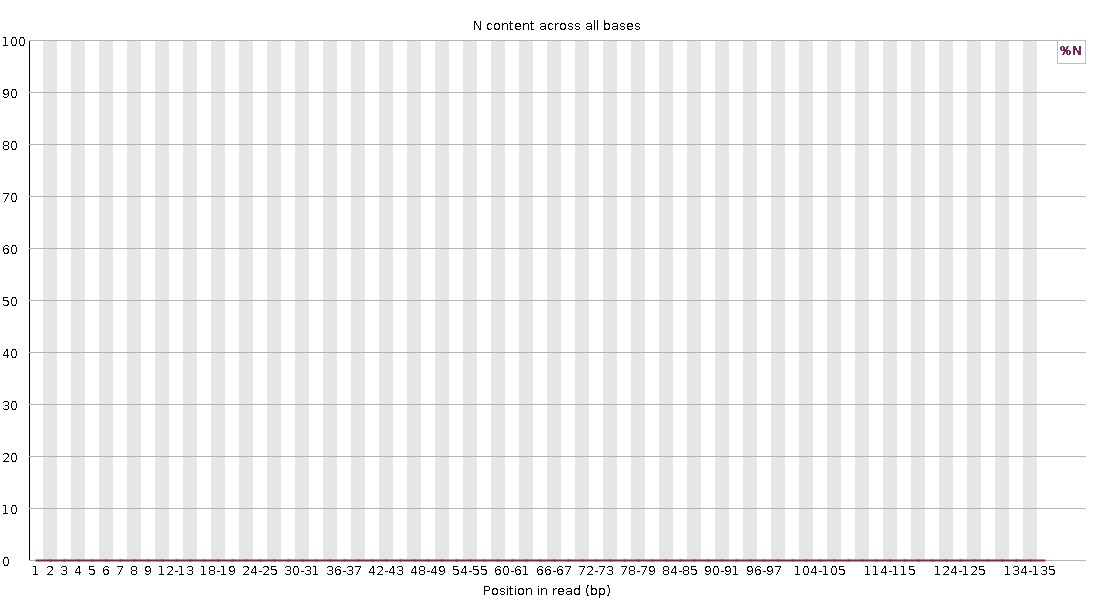
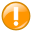
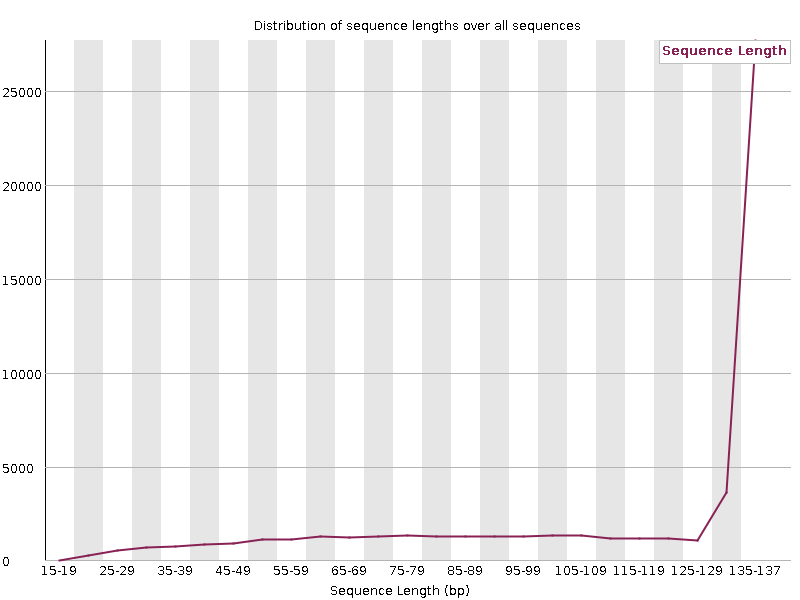
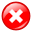
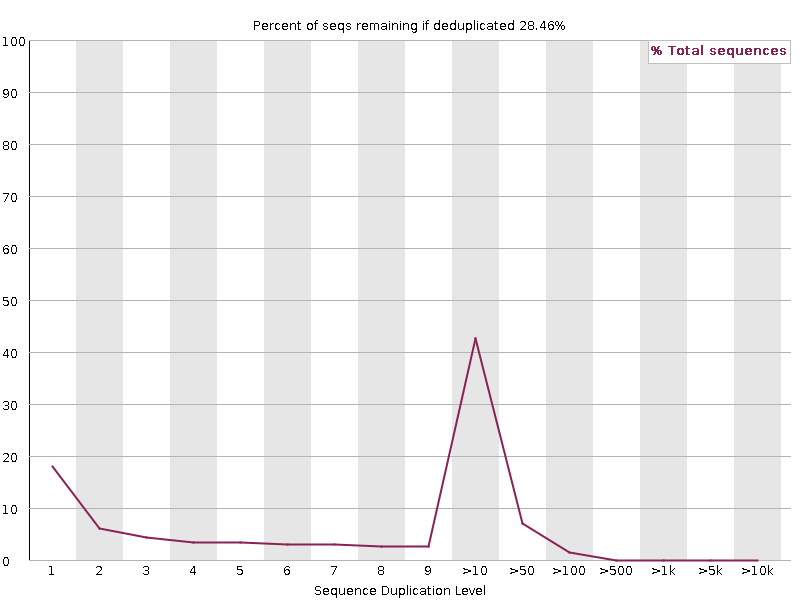
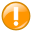
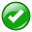
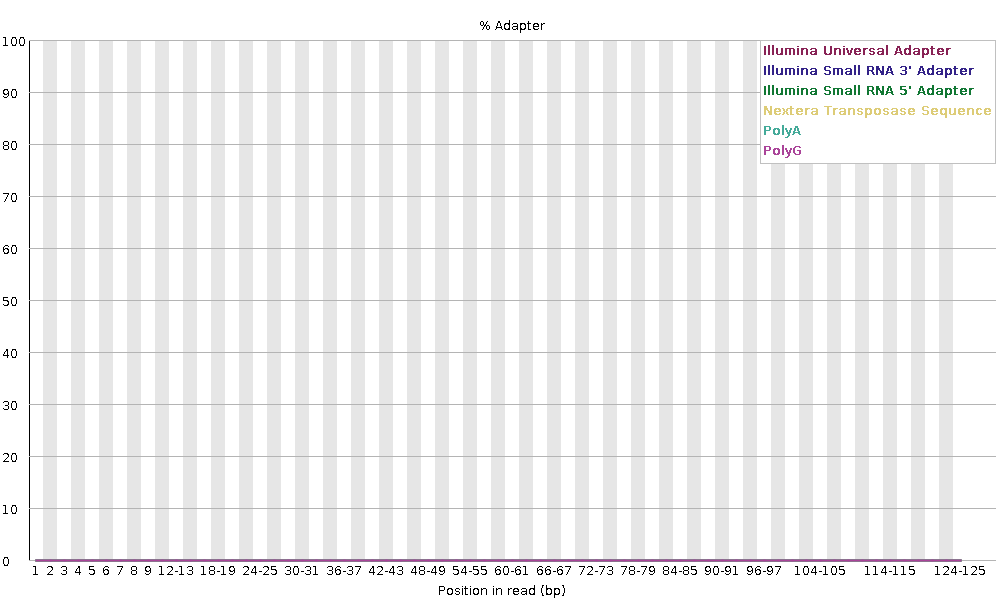

In [48]:
import os
from IPython.core.display import display, HTML

# Ask the user for the file name they want to display
file_name = input("Enter the name of the HTML file you want to display (include .html extension): ")

# Check if the file exists
if os.path.exists(file_name):
    # Open and read the HTML file
    with open(file_name, 'r') as file:
        html_content = file.read()
        display(HTML(html_content))  # Display the HTML content
else:
    print(f"File '{file_name}' not found. Please ensure the file exists in the current directory.")

**Align the Reads to a Reference Genome to Conduct a Guided Assembly by Mappi**ng

Check the available complete genomes in NCBI and download them to use as guide reference genomes.


In [ ]:
!datasets summary genome taxon "East African cassava mosaic virus" --assembly-level complete \
--as-json-lines | dataformat tsv genome --fields accession,organism-name,annotinfo-name
!datasets download genome accession GCF_000859785.1 --include gff3,rna,cds,protein,genome,seq-report
!unzip ncbi_dataset.zip

Copy the genome sequence in your current folder

In [50]:
!cp ncbi_dataset/data/GCF_000859785.1/GCF_000859785.1_ViralMultiSegProj15177_genomic.fna ./

**Format the Reference Genome for Use as a Guide**

In [51]:
!bwa index GCF_000859785.1_ViralMultiSegProj15177_genomic.fna

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.19-r1273
[main] CMD: bwa index GCF_000859785.1_ViralMultiSegProj15177_genomic.fna
[main] Real time: 0.043 sec; CPU: 0.006 sec


**Map the reads over the reference**

Mapping results are in field_isolated.sam

In [ ]:
!bwa mem GCF_000859785.1_ViralMultiSegProj15177_genomic.fna field_1_val_1.fq field_2_val_2.fq > field_isolated.sam

**Transform the results in sam format to bam format**

These comands will transform field_isolated.sam in field_isolated.bam, a compacted version

In [ ]:
!samtools view -bS field_isolated.sam > field_isolated.bam
!samtools sort field_isolated.bam -o field_isolated.bam
!samtools index field_isolated.bam

**Create a consensus and produce and assembled molecule**

The name of the assembled genome is field_isolated_consensus.fasta

In [ ]:
#!pilon --help
!pilon --genome GCF_000859785.1_ViralMultiSegProj15177_genomic.fna --frags field_isolated.bam --output field_isolated_consensus --vcf --changes

The generated results include an assembly of your reads based on the reference genome of the cassava virus obtained from NCBI. The number of corrections or polishing steps with Pilon could be important to investigate. Performing more than one iteration is recommended until no further changes are observed. For example, the code below assembles the reads based on the reference, creates the consensus, and runs Pilon two more times for additional polishing.

Input the files

In [63]:
# Request file names from the user
REFERENCE = input("Enter the file name for the initial reference genome (e.g., initial_assembly.fasta): ")
READS_R1 = input("Enter the file name for the first pair of reads (e.g., illumina_reads_R1.fastq): ")
READS_R2 = input("Enter the file name for the second pair of reads (e.g., illumina_reads_R2.fastq): ")

# Output prefix and other settings
OUTPUT_PREFIX = "polished_genome"  # Prefix for output files
THREADS = 2  # Number of threads for bwa and Samtools

KeyboardInterrupt: Interrupted by user

Run the pipeline

In [ ]:
import os

# Step 1: Initial Correction using the Original Reference
print("Starting initial Pilon correction with the original reference")

# Index the original reference for bwa
!bwa index "$REFERENCE"

# Align reads to the original reference
!bwa mem "$REFERENCE" "$READS_R1" -2 "$READS_R2" > aligned_reads.sam

# Convert SAM to sorted BAM and index it
!samtools view -Sb aligned_reads.sam | samtools sort -@ {THREADS} -o sorted_reads.bam
!samtools index sorted_reads.bam

# Run Pilon with the sorted BAM file for the initial correction
initial_output = f"{OUTPUT_PREFIX}_initial"
!pilon --genome "$REFERENCE" --frags sorted_reads.bam --output "$initial_output" --changes

# Set the first corrected reference for the looped corrections
current_reference = f"{initial_output}.fasta"

# Step 2: Looped Corrections Starting with First Corrected Output
for i in range(1, 3):
    print(f"Starting Pilon iteration {i} with the corrected reference")

    # Index the current reference for bwa
    !bwa index "$current_reference"

    # Align reads to the current reference
    !bwa mem "$current_reference" "$READS_R1" "$READS_R2" > aligned_reads.sam

    # Convert SAM to sorted BAM and index it
    !samtools view -Sb aligned_reads.sam | samtools sort -@ {THREADS} -o sorted_reads.bam
    !samtools index sorted_reads.bam

    # Run Pilon with the sorted BAM file
    pilon_output = f"{OUTPUT_PREFIX}_iter_{i}"
    !pilon --genome "$current_reference" --frags sorted_reads.bam --output "$pilon_output" --changes

    # Update the reference for the next iteration
    current_reference = f"{pilon_output}.fasta"

print("Pilon polishing complete after initial correction and 2 additional iterations.")


#*De Novo* Assembly#
De novo assembly pieces together DNA fragments to form contigs that represent an organism's chromosomes. This approach assembles a genome from scratch, without relying on a reference genome or prior knowledge of the DNA sequence.

Let’s conduct a de novo assembly using SPAdes with the metagenome option.

Run the SPAdes assembler with the metagenome (--meta) option. We use the --meta option because the reads may still contain sequences from more than one isolate or multiple types of viruses. However, SPAdes offers other assembly options that you can explore depending on the characteristics of your data. For example:

Standard SPAdes: Use for single-organism assemblies when contamination is minimal.

Plasmid SPAdes (--plasmid): Optimized for plasmid assembly.
Hybrid SPAdes (--trusted-contigs): Combines long-read and short-read data for improved assembly.
RNA-Seq SPAdes (--isolate): This flag is highly recommended for high-coverage isolate and multi-cell Illumina data; improves the assembly quality and running time

Feel free to experiment with these options to find the best fit for your dataset

https://ablab.github.io/spades/

In [ ]:
#2022-10-21 Steven Tang
#!wget http://cab.spbu.ru/files/release3.9.0/SPAdes-3.9.0-Linux.tar.gz
#!tar -xzf SPAdes-3.9.0-Linux.tar.gz

#2023-09-15 Renald Legaspi
#Updated: Spades3.9 to 3.15 since that version no longer runs on colab because a different version of python is being implemented.
#Fix: No longer installs the Linux tarfile due to segment fault issue. Spades is now being compiled from source.
# !wget http://cab.spbu.ru/files/release3.15.5/SPAdes-3.15.5.tar.gz
# !tar -xzf SPAdes-3.15.5.tar.gz
# !cd SPAdes-3.15.5
# !./SPAdes-3.15.5/spades_compile.sh

#2023-09-18 Steven Tang
#Fix: Use precompiled SPAdes that works with Colab
!wget https://github.com/steventango/colab-spades/releases/download/v3.15.5/SPAdes-3.15.5-Colab.tar.gz
!tar -xzf SPAdes-3.15.5-Colab.tar.gz


from datetime import datetime
from google.colab import files
from pathlib import Path
import subprocess

In [ ]:
# Tries to reduce the number of mismatches and short indels.
# Also runs MismatchCorrector: A post processing tool that uses BWA tool.
# Recommended mostly for small and/or low complexity genome.

#2022-10-21 Steven Tang
#careful_mode = True

#2023-09-15 Renald Legaspi
#Updated: Careful mode may cause the spades.py to crash due to insufficient RAM
careful_mode = False

#2023-09-15 Renald Legaspi
#Colab no longer implements python2; thus 'python /path/spades.py' is used instead of 'python2 /path/spades.py'

pe1_filename = "field_1_val_1.fq"
pe2_filename = "field_2_val_2.fq"
output_directory = f"{Path(pe1_filename).stem}_{Path(pe2_filename).stem}_{datetime.now().isoformat()}"

process = subprocess.run(
    f'python ./bin/spades.py -1 field_1_val_1.fq -2 field_2_val_2.fq -o field_meta_de_novo',
    capture_output=True,
    text=True,
    shell=True
)

print(process.stdout)
print(process.stderr)

In [86]:
%%bash
# 1️⃣  Install micromamba (lightweight conda replacement)
wget -qO- https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba > /dev/null

# 2️⃣  Initialize shell
eval "$(./bin/micromamba shell hook -s bash)"

# 3️⃣  Create environment with SPAdes
micromamba create -y -n asm -c bioconda -c conda-forge spades=3.15.0 seqkit pigz bbmap

# 4️⃣  Verify installation
#micromamba run -n asm spades.py --version

micromamba run -n asm spades.py -1 field_1_val_1.fq -2 field_2_val_2.fq -o field_meta_de_novo3

bioconda/linux-64                                           Using cache
bioconda/noarch                                             Using cache
conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache


Transaction

  Prefix: /root/.local/share/mamba/envs/asm

  Updating specs:

   - spades=3.15.0
   - seqkit
   - pigz
   - bbmap


  Package                           Version  Build               Channel           Size
─────────────────────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex                       0.1  conda_forge         conda-forge     Cached
  + _openmp_mutex                       4.5  2_gnu               conda-forge     Cached
  + alsa-lib                        1.2.7.2  h166bdaf_0          conda-forge     Cached
  + bbmap                          

warning  libmamba 'repo.anaconda.com', a commercial channel hosted by Anaconda.com, is used.
    
warning  libmamba Please make sure you understand Anaconda Terms of Services.
    
warning  libmamba See: https://legal.anaconda.com/policies/en/
/root/.local/share/mamba/envs/asm/share/spades/spades_pipeline/support.py:484: SyntaxWarning: invalid escape sequence '\d'
  return [atoi(c) for c in re.split("(\d+)", text)]
/root/.local/share/mamba/envs/asm/share/spades/spades_pipeline/support.py:540: SyntaxWarning: invalid escape sequence '\d'
  lib_number = int(option[re.search("\d", option).start()])
Traceback (most recent call last):
  File "/root/.local/share/mamba/envs/asm/bin/spades.py", line 651, in <module>
    main(sys.argv)
  File "/root/.local/share/mamba/envs/asm/bin/spades.py", line 591, in main
    print_params(log, log_filename, command_line, args, cfg)
  File "/root/.local/share/mamba/envs/asm/bin/spades.py", line 327, in print_params
    print_used_values(cfg, log)
  File "/ro

CalledProcessError: Command 'b'# 1\xef\xb8\x8f\xe2\x83\xa3  Install micromamba (lightweight conda replacement)\nwget -qO- https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba > /dev/null\n\n# 2\xef\xb8\x8f\xe2\x83\xa3  Initialize shell\neval "$(./bin/micromamba shell hook -s bash)"\n\n# 3\xef\xb8\x8f\xe2\x83\xa3  Create environment with SPAdes\nmicromamba create -y -n asm -c bioconda -c conda-forge spades=3.15.0 seqkit pigz bbmap\n\n# 4\xef\xb8\x8f\xe2\x83\xa3  Verify installation\n#micromamba run -n asm spades.py --version\n\nmicromamba run -n asm spades.py -1 field_1_val_1.fq -2 field_2_val_2.fq -o field_meta_de_novo3\n'' returned non-zero exit status 1.

The output of the assembly will be in the field_meta_de_novo_ folder. This folder contains several files, but you will need the contigs.fasta file. The assembly is located here.

Assess the metrics of the assembly using QUAST.

In [ ]:
!quast field_meta_de_novo/contigs.fasta

Check the report. You will find the number of contigs. Two contigs are larger than 1 Kb. These are the assemble viral genome.  

In [ ]:
!cat quast_results/latest/report.txt

#Comparision of two type of approaches
Comparing guided assembly with Pilon (using an existing reference to refine a new assembly) and de novo assembly (assembling a genome from scratch) brings both advantages and challenges. Let’s break down the pros and cons of each approach, as well as key post-analysis steps to consider for both.

Advantages and Disadvantages
1. Guided Assembly with Pilon (Reference-Guided)
Advantages:
Higher accuracy in correcting errors: Pilon leverages high-confidence reads (like Illumina) to polish assemblies, making it especially useful when using long-read assemblies (e.g., from Nanopore or PacBio) that may have higher base-calling errors.
Consistency with known reference: Using a reference genome ensures that conserved regions align well with established knowledge, making it easier to identify variant regions or perform comparative analyses.
Efficient for closely related species: When the target species is similar to the reference genome, reference-guided assembly can achieve high coverage with fewer ambiguities.
Disadvantages:
Bias towards the reference genome: Guided assembly may miss novel regions that are absent in the reference genome or over-represent reference biases, particularly in divergent regions.
Limited structural rearrangement detection: Large structural variants or genome rearrangements may be overlooked if the reference genome is heavily relied upon, as it constrains the assembly to follow reference structure.
2. De Novo Assembly
Advantages:

Discovery of novel sequences: De novo assembly can capture previously unknown or divergent regions that may not be present in any reference, which is critical for studying novel organisms or highly variable genomic regions.
More flexible structure: It provides a comprehensive picture of the genome without bias toward any reference, allowing for detection of structural variants, unique regions, and species-specific features.
Applicability to highly divergent species: When the target organism is distantly related to available references, de novo assembly avoids reference bias, allowing a more authentic genome reconstruction.
Disadvantages:

Higher computational and data demands: De novo assembly typically requires more computational resources and high-coverage sequencing data, especially for large genomes.
Increased assembly errors in repetitive regions: Without a reference to guide repetitive regions, it can be difficult to resolve these areas accurately, leading to fragmented or misassembled contigs.
Lower accuracy without polishing: De novo assemblies, especially those using long-read technologies, often require extensive polishing with high-confidence reads to achieve high accuracy.


# "Hybrid Pipeline for Viral Genome Assembly from Metagenomic Data: Integrating SPAdes and Pilon for Enhanced Accuracy"

Description:
This pipeline provides a streamlined, hybrid approach for assembling viral genomes directly from metagenomic data. Initially, SPAdes is employed in metagenomic mode to construct the preliminary assembly, leveraging its capacity to handle complex, mixed microbial communities. Following assembly, the draft genome undergoes refinement with Pilon, using high-quality short reads to polish and correct sequencing errors.

In [ ]:
# Request file names from the user
READS_R1 = input("Enter the file name for the first pair of reads (e.g., illumina_reads_R1.fastq): ")
READS_R2 = input("Enter the file name for the second pair of reads (e.g., illumina_reads_R2.fastq): ")
OUTPUT_PREFIX = "polished_genome"  # Prefix for output files
THREADS = 2  # Number of threads for SPAdes and Samtools

In [ ]:
import os

# Step 1: Run SPAdes Assembly
print("Starting de novo assembly with SPAdes")

!spades.py --meta -1 "$READS_R1" -2 "$READS_R2" -o spades_output --threads $THREADS

# Set the initial reference for Pilon as the SPAdes contigs output
REFERENCE = "spades_output/contigs.fasta"


# Step 1: Initial Correction using the Original Reference
print("Starting initial Pilon correction with the original reference")

# Index the original reference for bwa
!bwa index "$REFERENCE"

# Align reads to the original reference
!bwa mem "$REFERENCE" "$READS_R1" "$READS_R2" > aligned_reads.sam

# Convert SAM to sorted BAM and index it
!samtools view -Sb aligned_reads.sam | samtools sort -@ {THREADS} -o sorted_reads.bam
!samtools index sorted_reads.bam

# Run Pilon with the sorted BAM file for the initial correction
initial_output = f"{OUTPUT_PREFIX}_initial"
!pilon --genome "$REFERENCE" --frags sorted_reads.bam --output "$initial_output" --changes

# Set the first corrected reference for the looped corrections
current_reference = f"{initial_output}.fasta"

# Step 2: Looped Corrections Starting with First Corrected Output
for i in range(1, 3):
    print(f"Starting Pilon iteration {i} with the corrected reference")

    # Index the current reference for bwa
    !bwa index "$current_reference"

    # Align reads to the current reference
    !bwa mem "$current_reference" "$READS_R1" "$READS_R2" > aligned_reads.sam

    # Convert SAM to sorted BAM and index it
    !samtools view -Sb aligned_reads.sam | samtools sort -@ {THREADS} -o sorted_reads.bam
    !samtools index sorted_reads.bam

    # Run Pilon with the sorted BAM file
    pilon_output = f"{OUTPUT_PREFIX}_iter_{i}"
    !pilon --genome "$current_reference" --frags sorted_reads.bam --output "$pilon_output" --changes

    # Update the reference for the next iteration
    current_reference = f"{pilon_output}.fasta"

print("Pilon polishing complete after initial correction and 3 additional iterations.")

You can run quast in the assembly results and compare